In [1]:
ROWID = ['f_0']
DATE = ['f_1']
CATEGORIES = [ f'f_{i}' for i in range(2,33) ]
BINARY = [ f'f_{i}' for i in range(33,42) ]
NUMERICAL = [ f'f_{i}' for i in range(42,80) ]
IS_CLICKED = ['is_clicked']
IS_INSTALLED =['is_installed']

In [2]:
import pandas as pd
missing = pd.read_csv('../Data/miss_combine.csv')

In [30]:
for cat in CATEGORIES:
    print(missing.groupby(cat).mean()[IS_INSTALLED].sort_values(ascending=False,by=IS_INSTALLED[0]))
    print("##"*10)

       is_installed
f_2                
32683      0.996950
19970      0.777228
11437      0.756557
2689       0.743945
23199      0.666950
...             ...
15432      0.007463
20333      0.003993
30061      0.000000
5258       0.000000
23402      0.000000

[136 rows x 1 columns]
####################
       is_installed
f_3                
22294      0.197121
563        0.196949
7779       0.082962
7152       0.060575
2381       0.032618
####################
       is_installed
f_4                
15934      1.000000
21079      0.998916
19033      0.994839
19583      0.994248
29262      0.951724
...             ...
28995      0.002981
14647      0.000000
1772       0.000000
31103      0.000000
1795       0.000000

[633 rows x 1 columns]
####################
       is_installed
f_5                
19475      0.197129
25604      0.177712
21545      0.171905
15908      0.168693
19072      0.165229
29304      0.141660
####################
       is_installed
f_6                
3169    

In [17]:
missing.groupby('f_2').mean()[IS_INSTALLED]

,is_installed
f_2,
788,0.611597
820,0.298525
890,0.061731
931,0.139442
968,0.043325
...,...
31723,0.395711
31824,0.242106
32091,0.286408


In [18]:
missing.groupby('f_3').mean()[IS_INSTALLED]

,is_installed
f_3,
563,0.196949
2381,0.032618
7152,0.060575
7779,0.082962
22294,0.197121


In [19]:
missing.groupby('f_4').mean()[IS_INSTALLED]

,is_installed
f_4,
61,0.013548
75,0.307116
150,0.134615
199,0.142857
243,0.702703
...,...
32544,0.022159
32577,0.309140
32629,0.166667


In [20]:
missing.groupby('f_5').mean()[IS_INSTALLED]

,is_installed
f_5,
15908,0.168693
19072,0.165229
19475,0.197129
21545,0.171905
25604,0.177712
29304,0.141660


In [21]:
missing.groupby('f_6').mean()[IS_INSTALLED]

,is_installed
f_6,
5,0.500000
15,0.333333
18,0.125000
20,0.417722
23,0.137931
...,...
32748,0.000000
32752,0.142857
32758,0.000000


In [22]:
missing.groupby('f_7').mean()[IS_INSTALLED]

,is_installed
f_7,
27941,0.174018


In [23]:
missing.groupby('f_8').mean()[IS_INSTALLED]

,is_installed
f_8,
18800,0.152818
19203,0.170259
19606,0.163621
20009,0.148258
21218,0.185816
21621,0.202294


In [24]:
missing.groupby('f_9').mean()[IS_INSTALLED]

,is_installed
f_9,
869,0.163172
6675,0.166269
9638,0.209270
14659,0.173925
21533,0.148962
23218,0.178261
31372,0.183359


In [25]:
missing.groupby('f_10').mean()[IS_INSTALLED]

,is_installed
f_10,
19343,0.163495
21574,0.203218
22970,0.188249


In [26]:
print(missing.groupby('f_2').mean()[IS_INSTALLED])

       is_installed
f_2                
788        0.611597
820        0.298525
890        0.061731
931        0.139442
968        0.043325
...             ...
31723      0.395711
31824      0.242106
32091      0.286408
32462      0.186609
32683      0.996950

[136 rows x 1 columns]


In [37]:
missing['f_30'].fillna(missing['f_30'].mode()[0],inplace=True)
missing['f_31'].fillna(missing['f_31'].mode()[0],inplace=True)
from tqdm import tqdm
fmiss = "f_43,f_51,f_58,f_59,f_64,f_65,f_66,f_67,f_68,f_69,f_70".split(',')
for f in tqdm(fmiss,desc="NUM IMPUTE"):
    missing[f].fillna(missing[f].mean(),inplace=True)

NUM IMPUTE: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 46.28it/s]


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()
missing[NUMERICAL] = sc.fit_transform(missing[NUMERICAL])

In [40]:
out = missing.groupby(DATE)[NUMERICAL].mean()

In [41]:
type(out)

pandas.core.frame.DataFrame

In [42]:
out.index

Int64Index([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
            62, 63, 64, 65, 66],
           dtype='int64', name='f_1')

In [43]:
import seaborn as sns

<AxesSubplot: xlabel='f_1'>

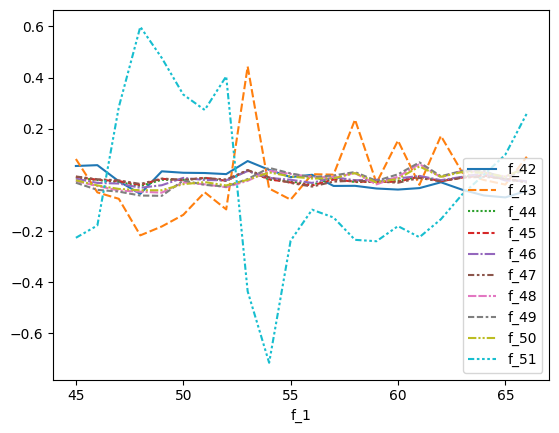

In [47]:
sns.lineplot(data=out[NUMERICAL[:10]])

<AxesSubplot: xlabel='f_1'>

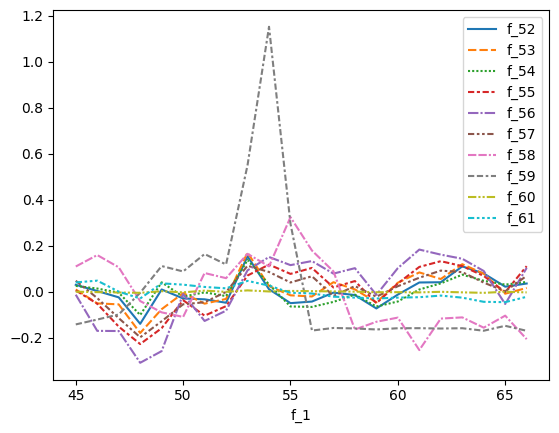

In [48]:
sns.lineplot(data=out[NUMERICAL[10:20]])

<AxesSubplot: xlabel='f_1'>

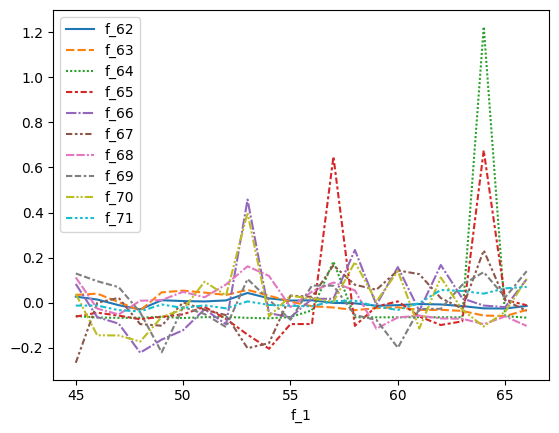

In [49]:
sns.lineplot(data=out[NUMERICAL[20:30]])

<AxesSubplot: xlabel='f_1'>

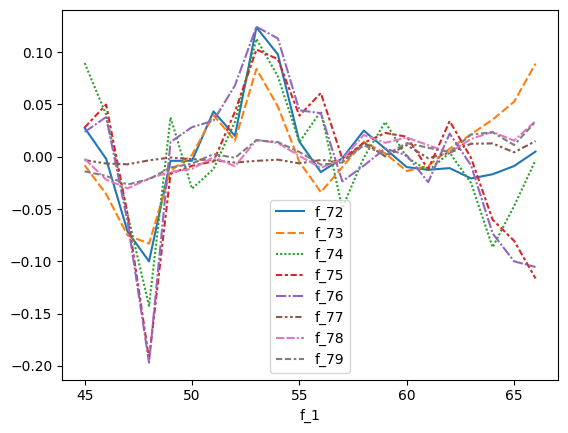

In [50]:
sns.lineplot(data=out[NUMERICAL[30:]])

In [51]:
out = missing.groupby(DATE)[IS_CLICKED+IS_INSTALLED].sum()

<AxesSubplot: xlabel='f_1'>

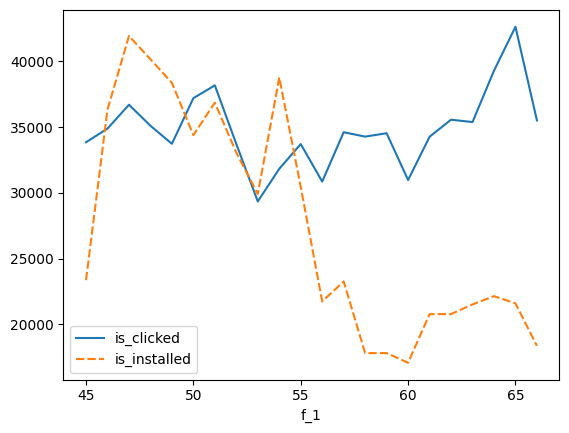

In [54]:
sns.lineplot(data=out)

In [59]:
out = missing.groupby(DATE)[BINARY].sum()

<AxesSubplot: xlabel='f_1'>

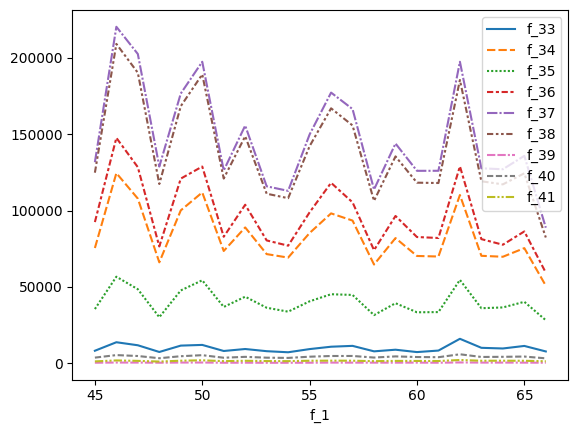

In [60]:
sns.lineplot(data=out)

In [63]:
corr = missing[NUMERICAL+IS_CLICKED+IS_INSTALLED].corr()[IS_CLICKED+IS_INSTALLED]

In [67]:
corr[corr[IS_CLICKED]>=0.1]

,is_clicked,is_installed
f_42,NaN,NaN
f_43,0.204870,NaN
f_44,NaN,NaN
f_45,NaN,NaN
f_46,NaN,NaN
f_47,NaN,NaN
f_48,0.108097,NaN
f_49,NaN,NaN
f_50,0.115059,NaN
f_51,NaN,NaN


In [68]:
is_clicked_corr_feat = ['f_43','f_48','f_50','f_66','f_68','f_69','f_70','f_72','f_73']

In [72]:
corr[corr[IS_INSTALLED]>=0.1]

,is_clicked,is_installed
f_42,NaN,NaN
f_43,NaN,NaN
f_44,NaN,NaN
f_45,NaN,NaN
f_46,NaN,NaN
f_47,NaN,NaN
f_48,NaN,NaN
f_49,NaN,NaN
f_50,NaN,NaN
f_51,NaN,NaN


In [73]:
is_clicked_corr_feat = ['f_58','f_59','f_50','f_68']

In [77]:
out = missing.groupby(CATEGORIES[0])[IS_CLICKED+IS_INSTALLED].mean()

In [78]:
len(out)

136

We will use this equation to add in the effect of time to the model as we see that as time progreses the 
$y=-2x^{2}\ +1.5x+1$